<a href="https://colab.research.google.com/github/spykeshivam/Contrastive_learning/blob/main/ContrastiveLearning_Pointclouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab

In [2]:
import condacolab #Good support for layer types for pointclouds
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:17
🔁 Restarting kernel...


In [105]:
import torch
version = torch.__version__
print(version)

2.5.1+cu124


In [1]:
# Install torch geometric for point-cloud layers
import torch
version = f"https://data.pyg.org/whl/torch-{torch.__version__}.html"
try:
    import torch_geometric
except:
    !echo $version
    !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f $version
    import torch_geometric

https://data.pyg.org/whl/torch-2.5.1+cu124.html
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 116.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 115.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 65.5 MB/s eta 0:00:00


In [32]:
from torch_geometric.datasets import ModelNet
import torch_geometric.transforms as T
# Limit to 5000 samples, due to RAM restrictions
path='.'
pre_transform, transform = T.NormalizeScale(), T.SamplePoints(1024)
train_dataset = ModelNet(path, '10', True, transform, pre_transform)
test_dataset = ModelNet(path, '10', False, transform, pre_transform)



In [33]:
print("Number of Samples: ", len(train_dataset))
print("Sample: ", train_dataset[0])

Number of Samples:  3991
Sample:  Data(pos=[1024, 3], y=[1])


In [34]:
from torch_geometric.loader import DataLoader
import torch_geometric.transforms as T


In [35]:
train_dataset[0].pos

tensor([[ 0.1284,  0.1994, -0.1305],
        [ 0.0077, -0.3185,  0.0695],
        [ 0.3431, -0.5164, -0.2040],
        ...,
        [ 0.2384,  0.3887,  0.0779],
        [ 0.0376,  0.5645, -0.2161],
        [ 0.3048, -0.3931,  0.0815]])

In [41]:
from torch_geometric.datasets import ModelNet
import torch_geometric.transforms as T

# Define the classes to keep
classes_to_keep = ['bathtub', 'bed', 'night_stand', 'table', 'toilet']

# Create mapping from class name to index
class_name_to_index = {
    'bathtub': 0,
    'bed': 1,
    'chair': 2,
    'desk': 3,
    'dresser': 4,
    'monitor': 5,
    'night_stand': 6,
    'sofa': 7,
    'table': 8,
    'toilet': 9
}

# Get indices of the classes to keep
indices_to_keep = [class_name_to_index[cls] for cls in classes_to_keep]

path = '.'
pre_transform, transform = T.NormalizeScale(), T.SamplePoints(1024)

# Create the original datasets
train_dataset_full = ModelNet(path, '10', True, transform, pre_transform)
test_dataset_full = ModelNet(path, '10', False, transform, pre_transform)

# Filter the datasets
def filter_dataset(dataset, indices):
    filtered_data = []
    for data in dataset:
        if data.y in indices:
            filtered_data.append(data)
    return filtered_data

train_dataset = filter_dataset(train_dataset_full, indices_to_keep)
test_dataset = filter_dataset(test_dataset_full, indices_to_keep)


print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")



Train dataset size: 1557
Test dataset size: 436


In [72]:
print("Number of Samples in the train_dataset: ", len(train_dataset))
print("Sample: ", train_dataset[0])

Number of Samples in the train_dataset:  1557
Sample:  Data(pos=[1024, 3], y=[1])


In [43]:
#!pip install plotly --quiet
import plotly.express as px


def plot_3d_shape(shape, index):
    print(f"Plotting shape at index: {index}")
    print("Number of data points: ", shape.pos.shape[0])
    x = shape.pos[:, 0]
    y = shape.pos[:, 1]
    z = shape.pos[:, 2]

    class_index = shape.y
    class_name = class_names.get(class_index.item())

    if class_name is not None:
        title = f"3D Shape - Class: {class_name} (Index: {index})"
    else:
        title = f"3D Shape - Class Index: {index}"

    fig = px.scatter_3d(x=x, y=y, z=z, opacity=0.3, title=title)
    fig.show()
    print("Shape Class Index: ", shape.y)

# Pick a list of sample indices
sample_indices = [50, 100, 150, -1500, -1]

for sample_idx in sample_indices:
    plot_3d_shape(train_dataset[sample_idx], sample_idx)

Plotting shape at index: 50
Number of data points:  1024


Shape Class Index:  tensor([0])
Plotting shape at index: 100
Number of data points:  1024


Shape Class Index:  tensor([0])
Plotting shape at index: 150
Number of data points:  1024


Shape Class Index:  tensor([1])
Plotting shape at index: -1500
Number of data points:  1024


Shape Class Index:  tensor([0])
Plotting shape at index: -1
Number of data points:  1024


Shape Class Index:  tensor([9])


In [44]:
from collections import Counter
def count_classes(dataset):
    class_counts = Counter()
    for data in dataset:
        class_counts[data.y.item()] += 1  # Use .item() to get the actual int value
    return class_counts

train_counts = count_classes(train_dataset)
test_counts = count_classes(test_dataset)


In [45]:
print("Train set class counts:")
print(train_counts)
print("\nTest set class counts:")
print(test_counts)

Train set class counts:
Counter({1: 515, 8: 392, 9: 344, 6: 200, 0: 106})

Test set class counts:
Counter({1: 100, 8: 100, 9: 100, 6: 86, 0: 50})


In [62]:
from torch_geometric.loader import DataLoader
import torch_geometric.transforms as T

data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


augmentation = T.Compose([T.RandomJitter(0.03), T.RandomFlip(1), T.RandomShear(0.2),T.RandomScale((0.8, 1.2))])

In [63]:
# Original data point
sample = next(iter(data_loader))
plot_3d_shape(sample[0],0)

Plotting shape at index: 0
Number of data points:  1024


Shape Class Index:  tensor([8])


In [64]:
transformered = augmentation(sample)
plot_3d_shape(transformered[0],0)

Plotting shape at index: 0
Number of data points:  1024


Shape Class Index:  tensor([8])


In [65]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import MLP, DynamicEdgeConv, global_max_pool


class Model(torch.nn.Module):
    def __init__(self, k=20, aggr='max'):
        super().__init__()
        # Feature extraction
        self.conv1 = DynamicEdgeConv(MLP([2 * 3, 64, 64]), k, aggr)
        self.conv2 = DynamicEdgeConv(MLP([2 * 64, 128]), k, aggr)
        # Encoder head
        self.lin1 = Linear(128 + 64, 128)
        # Projection head (See explanation in SimCLRv2)
        self.mlp = MLP([128, 256, 32], norm=None)

    def forward(self, data, train=True):
        if train:
            # Get 2 augmentations of the batch
            augm_1 = augmentation(data)
            augm_2 = augmentation(data)

            # Extract properties
            pos_1, batch_1 = augm_1.pos, augm_1.batch
            pos_2, batch_2 = augm_2.pos, augm_2.batch

            # Get representations for first augmented view
            x1 = self.conv1(pos_1, batch_1)
            x2 = self.conv2(x1, batch_1)
            h_points_1 = self.lin1(torch.cat([x1, x2], dim=1))

            # Get representations for second augmented view
            x1 = self.conv1(pos_2, batch_2)
            x2 = self.conv2(x1, batch_2)
            h_points_2 = self.lin1(torch.cat([x1, x2], dim=1))

            # Global representation
            h_1 = global_max_pool(h_points_1, batch_1)
            h_2 = global_max_pool(h_points_2, batch_2)
        else:
            x1 = self.conv1(data.pos, data.batch)
            x2 = self.conv2(x1, data.batch)
            h_points = self.lin1(torch.cat([x1, x2], dim=1))
            return global_max_pool(h_points, data.batch)

        # Transformation for loss function
        compact_h_1 = self.mlp(h_1)
        compact_h_2 = self.mlp(h_2)
        return h_1, h_2, compact_h_1, compact_h_2

In [73]:
# See https://kevinmusgrave.github.io/pytorch-metric-learning/losses/#ntxentloss
!pip install pytorch-metric-learning -q

from pytorch_metric_learning.losses import NTXentLoss
loss_func = NTXentLoss(temperature=0.10)

In [75]:

#ModelNet gives train and test dataset seperately. We will combine them
print("Number of train Samples: ", len(train_dataset))
print("Number of test Samples: ", len(train_dataset))
combined_dataset = train_dataset + test_dataset

Number of train Samples:  1557
Number of test Samples:  1557


In [76]:
combined_dataset = train_dataset + test_dataset
print("Number of train Samples: ", len(combined_dataset))

Number of train Samples:  1993


In [78]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)



# Use a large batch size (might lead to RAM issues)
# Free Colab Version has ~ 12 GB of RAM
data_loader = DataLoader(combined_dataset, batch_size=32, shuffle=True)


In [80]:
import tqdm

def train():
    model.train()
    total_loss = 0
    for _, data in enumerate(tqdm.tqdm(data_loader)):
        data = data.to(device)
        optimizer.zero_grad()
        # Get data representations
        h_1, h_2, compact_h_1, compact_h_2 = model(data)
        # Prepare for loss
        embeddings = torch.cat((compact_h_1, compact_h_2))
        # The same index corresponds to a positive pair
        indices = torch.arange(0, compact_h_1.size(0), device=compact_h_2.device)
        labels = torch.cat((indices, indices))
        loss = loss_func(embeddings, labels)
        loss.backward()
        total_loss += loss.item() * data.num_graphs
        optimizer.step()
    return total_loss / len(combined_dataset)

for epoch in range(1, 4):
    loss = train()
    print(f'Epoch {epoch:03d}, Loss: {loss:.4f}')
    scheduler.step()

100%|██████████| 63/63 [00:38<00:00,  1.65it/s]


Epoch 001, Loss: 0.5741


100%|██████████| 63/63 [00:37<00:00,  1.67it/s]


Epoch 002, Loss: 0.4236


100%|██████████| 63/63 [00:37<00:00,  1.67it/s]

Epoch 003, Loss: 0.4069


# **Evaluation**

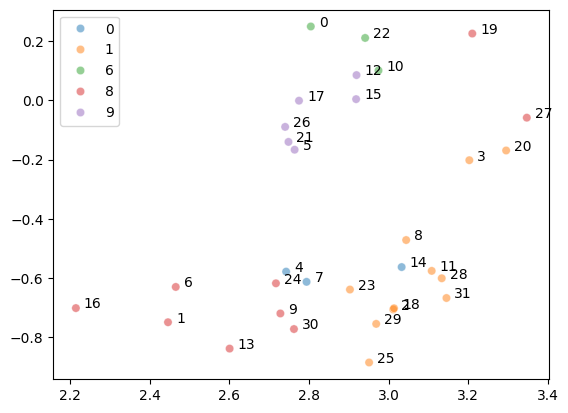

In [97]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Get sample batch
sample = next(iter(data_loader))

# Get representations
h = model(sample.to(device), train=False)
h = h.cpu().detach()
labels = sample.y.cpu().detach().numpy()

# Get low-dimensional t-SNE Embeddings
h_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(h.numpy())

# Plot
ax = sns.scatterplot(x=h_embedded[:,0], y=h_embedded[:,1], hue=labels,
                    alpha=0.5, palette="tab10")

# Add labels to be able to identify the data points
annotations = list(range(len(h_embedded[:,0])))

def label_points(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(int(point['val'])))

label_points(pd.Series(h_embedded[:,0]),
            pd.Series(h_embedded[:,1]),
            pd.Series(annotations),
            plt.gca())

In [98]:
import numpy as np

def sim_matrix(a, b, eps=1e-8):
    """
    Eps for numerical stability
    """
    a_n, b_n = a.norm(dim=1)[:, None], b.norm(dim=1)[:, None]
    a_norm = a / torch.max(a_n, eps * torch.ones_like(a_n))
    b_norm = b / torch.max(b_n, eps * torch.ones_like(b_n))
    sim_mt = torch.mm(a_norm, b_norm.transpose(0, 1))
    return sim_mt

similarity = sim_matrix(h, h)
max_indices = torch.topk(similarity, k=2)[1][:, 1]
max_vals  = torch.topk(similarity, k=2)[0][:, 1]

# Select index
idx = 6
similar_idx = max_indices[idx]
print(f"Most similar data point in the embedding space for {idx} is {similar_idx}")

Most similar data point in the embedding space for 6 is 24


In [99]:
plot_3d_shape(sample[idx].cpu(),0)

Plotting shape at index: 0
Number of data points:  1024


Shape Class Index:  tensor([8])


In [102]:
plot_3d_shape(sample[similar_idx].cpu(),0)

Plotting shape at index: 0
Number of data points:  1024


Shape Class Index:  tensor([8])


In [104]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Create a directory to save models (optional, but good practice)
models_dir = '/content/drive/MyDrive/saved_models'  # Adjust path as needed
os.makedirs(models_dir, exist_ok=True)

# Save the model after training
model_path = os.path.join(models_dir, 'trained_model.pth')  # Choose a filename
torch.save(model.state_dict(), model_path)  # Save the model's state dictionary
print(f"Model saved to: {model_path}")

Mounted at /content/drive
Model saved to: /content/drive/MyDrive/saved_models/trained_model.pth
